# Latar Belakang
TransJakarta adalah sebuah sistem transportasi Bus Rapid Transit (BRT) pertama di Asia Tenggara dan Selatan dengan jalur lintasan terpanjang di dunia (208 km). Sistem BRT ini didesain berdasarkan sistem TransMilenio di Bogota, Kolombia. Beroperasi sejak tahun 2004 di Jakarta, Indonesia. TransJakarta memiliki 252 halte yang tersebar dalam 14 koridor (rute utama), yang pada awalnya beroperasi dari pukul 05.00–22.00 WIB, dan kini beroperasi selama 24 jam di seluruh koridornya.

# Context - Audience
Audience nya manajemen TransJakarta

# Business Problem
Perusahaan ingin meningkatkan service level terhadap pengguna TransJakarta

# Goals
Perusahaan ingin meningkatkan service level terhadap pengguna TransJakarta, baik dari sisi penambahan rute, armada atau pun halte yang mamadai untuk menampung kapasitas penumpang di tiap halte dengan mempertimbangkan pendapatan yang diperoleh dari masing-masing koridor TransJakarta.

## Pernyataan Masalah
Berdasarkan Latar Belakang di atas, maka Perusahaan ingin mengetahui informasi yang bisa membantu perusahaan untuk dapat meningkatkan service level atau pelayanan Perusahaan kepada pengguna TransJakarta, kita akan mencoba mengindetifikasi beberapa masalah sebagai berikut:

1. Waktu yang paling padat 
2. Koridor mana yang paling banyak di gunakan
3. Halte yang paling padat
4. Jenis Kelamin pengguna Transjakarta
5. Kartu Pembayaran untuk transaksi TransJakarta


# DataSet
Untuk menjawab pertanyaan di atas, kita sebagai Data Analyst Perusahaan TransJakarta akan menganalisa DataSet dari semua Transaksi Transjakarta yang sudah dikumpulkan oleh perusahaan.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Dataset yang digunakan adalah Data Public Transportation Transaction Transjakarta, yang berisi informasi transaksi transjakarta selama Bulan April 2023 terkait penggunaan transjakarta oleh setiap masyarakat dalam beraktifitas sehari-hari. Dataset Transjakarta ini terdiri dari 22 kolom, yaitu:  

* Transjakarta.csv
1.	transID: Id transaksi yang unik untuk setiap transaksi
2.	payCardID: Pengenal utama pelanggan. Kartu yang digunakan pelanggan sebagai tiket masuk dan keluar.
3.	payCardBank: Nama bank penerbit kartu pelanggan
4.	payCardName: Nama pelanggan yang tercantum di dalam kartu.
5.	payCardSex: Jenis kelamin pelanggan yang tertanam dalam kartu
6.	payCardBirthDate: Tahun kelahiran pelanggan
7.	corridorID: ID Koridor / ID Rute sebagai kunci untuk pengelompokan rute.
8.	corridorName: Nama Koridor / Nama Rute berisi Start dan Finish untuk setiap rute.
9.	direction: 0 untuk Pergi, 1 untuk Kembali. Arah dari rute.
10.	tapInStops: Ketuk Masuk (pintu masuk) ID Halte untuk mengidentifikasi nama halte
11.	tapInStopsName: Ketuk Masuk (pintu masuk) Nama Halte tempat pelanggan mengetuk masuk.
12.	tapInStopsLat: Garis Lintang dari Tap In Halte
13.	tapInStopsLon: Bujur dari Tap In (pintu masuk) Perhentian
14.	stopStartSeq: Urutan pemberhentian, pemberhentian pertama, pemberhentian kedua, dst. Terkait dengan arah.
15.	tapInTime: Waktu tap in. Tanggal dan waktu
16.	tapOutStops: Ketuk Keluar (Keluar) ID Halte untuk mengidentifikasi nama halte
17.	tapOutStopsName: Tap Out (Keluar) Nama Halte tempat pelanggan melakukan tap out.
18.	tapOutStopsLat: Garis Lintang Tap Out (keluar) Pemberhentian
19.	tapOutStopsLon: Bujur dari Tap Out Stops
20.	stopEndSeq: Urutan pemberhentian, pemberhentian pertama, pemberhentian kedua, dst. Terkait dengan arah.
21.	tapOutTime: Waktu tap out. Tanggal dan waktu
22.	payAmount: Jumlah yang harus dibayar pelanggan. Ada yang gratis. Beberapa tidak.



Berikut 5 baris teratas dan terbawah dari dataset Transjakarta.csv.

In [2]:
df=pd.read_csv('D:/Data Scince Purwadhika/Modul 2/Capstone_Project_Module_2/Transjakarta.csv')
display(df.head(),df.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


## Data Understanding and Cleaning

Proses Data Understanding dan Cleaning merupakan tahap awal dalam pengolahan data yang bertujuan untuk memahami karakteristik dan kualitas data yang dimiliki, serta membersihkannya dari potensi kesalahan atau kekurangan. Langkah-langkah ini sangat penting untuk memastikan data yang digunakan dalam analisis atau model memiliki kualitas yang baik dan dapat diandalkan.

Data Understanding:
Pertama-tama, kita melakukan eksplorasi terhadap dataset yang tersedia. Ini melibatkan:
1. Pemahaman Kolom: Mengidentifikasi dan memahami setiap kolom dalam dataset untuk mengetahui informasi apa yang mereka miliki.
2. Statistik Deskriptif: Melakukan analisis statistik deskriptif untuk memahami distribusi nilai, rata-rata, median, deviasi standar, dan lainnya.
3. Visualisasi Data: Membuat visualisasi data seperti histogram, box plot, atau scatter plot untuk membantu pemahaman visual terhadap pola data.
4. Korelasi: Menilai korelasi antar kolom untuk memahami hubungan antar variabel.



In [3]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (37900, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-nul

In [4]:
display(df.describe(), df.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


In [5]:

# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57T..."
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095..."
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, ..."
4,payCardSex,2,"[M, F]"
5,payCardBirthDate,67,"[2008, 1997, 1992, 1978, 1982, 1993, 1974, 199..."
6,corridorID,221,"[5, 6C, R1A, 11D, 12, 1T, JAK.18, nan, B14, 1Q..."
7,corridorName,216,"[Matraman Baru - Ancol, Stasiun Tebet - Karet ..."
8,direction,2,"[1.0, 0.0]"
9,tapInStops,2570,"[P00142, B01963P, B00499P, B05587P, P00239, B0..."


In [6]:
#melihat apakah ada data duplikasi
df.duplicated().sum()

0

# Mising Data

In [7]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()
# analisa missing value
df.isna().sum()


Jumlah baris dan kolom di dataset df adalah (37900, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-nul

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [8]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.316623
corridorName        5.092348
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64

<Axes: >

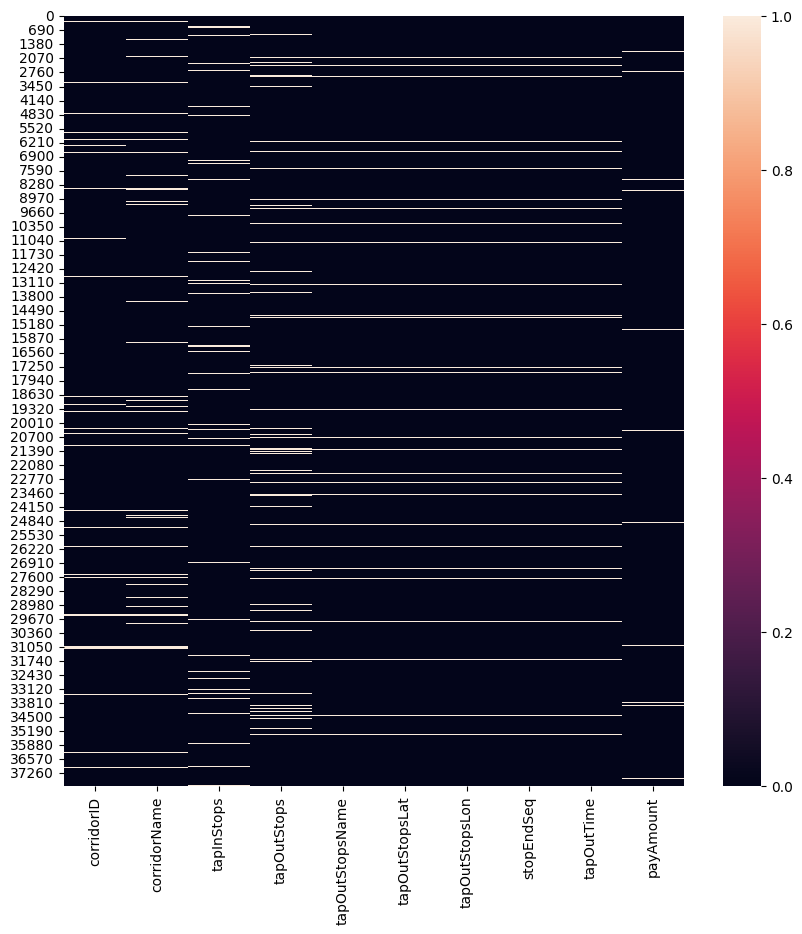

In [9]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['corridorID','corridorName','tapInStops','tapOutStops','tapOutStopsName','tapOutStopsLat','tapOutStopsLon','stopEndSeq','tapOutTime','payAmount']].isna())

# Secara umum, kita bisa melihat bahwa:

* Dataset Transjakarta memiliki 22 kolom dengan 37.900 baris
* Beberapa kolom, yaitu, corridorID, corridorName, tapInStops, tapOutStops, tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, tapOutTime dan payAmount memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data Blank.
* Dari semua kolom yang terdapat *missing value*, kita analisa kolom satu persatu, pertama kita coba lihat kolom corridorID dan corridorName, jika dari definisi yang diberikan, corridorID dan corridorName adalah kolom yang saling berkaitan, makan dari itu kita bisa meminimalisir data missing yang ada, karena salah satu cara untuk mengatasi data missing adalah dengan menghapus atau mengisi nya dengan data yang serupa. Jika untuk kolom corridorID dan corridorName kita hapus baris yang kosong, maka kita kehilangan data sebesar sebesar 5% dari menghapus data missing di kedua kolom tersebut. maka dari itu kita akan coba mengisi data kosong di corridorName, karena dari struktur data kolom corridorName bisa menjadi salah satu analisa selanjutnya dan datanya jg banyak yang kosong, untuk mengisinya kita akan mengisi data kosong di corridorName dengan melihat corridorID, untuk itu dari data corridorName yang missing sebanyak   1930, bisa di isi dan menjadi 1257 (langkah seperti perintah / query di bawah)
* Untuk kolom tapInStops, tapOutStops, tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq dari struktur data di dalam, tidak ada hubungan untuk analisa, dan untuk data tersebut tidak menjadi salah satu permasalahan yang ingin kita lihat.
* Sedangkan kolom tapOutTime yang kosong kita lakukan menghapus data kosong tersebut. Insight yang bisa di jelaskan dari data kosong tersebut adalah, banyak penumpang atau ada yang tidak melakukan Tap out, saat keluar di halte (bisa karena sistem sedang Online), atau penumpang tersebut melakukan transit koridor dan melakukan tap Out di Bus Transjakarta di halte tambahan yang di pinggir jalan maka dari itu dari grafik di atas bisa dilihat bahwa, jika tapOutTime maka tapOutStops, tapOutStopsName, tapOutStopsLat, tapOutStopsLon dan stopEndSeq juga kosong, maka dari itu kita hapus.



# Membuat subset kolom dan melihat data missing pada kedua kolom tersebut:

In [10]:
# Subset at Kolom
df2 = df.iloc[:,6:8]

# Check Inisial Nilai NA
df2.isna().sum()

corridorID      1257
corridorName    1930
dtype: int64

* Membuat Dictionary sebagai refrensi :

In [11]:
# Membuat Dictionary as Reference
# Drop Duplicate & Nilai NA
df3 = df2.drop_duplicates().dropna()

# Membuat Dictionary from df3
dict1 = df3.to_dict()
dict1
# This contains 221 Unique values

{'corridorID': {0: '5',
  1: '6C',
  2: 'R1A',
  3: '11D',
  4: '12',
  5: '1T',
  6: 'JAK.18',
  8: 'B14',
  9: '1Q',
  10: '5M',
  11: 'M7B',
  12: '9A',
  13: '4',
  14: 'JAK.46',
  15: 'S22',
  16: '13',
  17: '9E',
  18: 'M9',
  19: 'JAK.88',
  20: 'T11',
  21: 'JAK.16',
  22: '6V',
  23: '11Q',
  24: 'JAK.02',
  25: '11',
  26: '1C',
  27: '3B',
  29: 'M1',
  31: '7E',
  32: '1P',
  33: '7D',
  34: '6H',
  35: '14',
  36: 'BW9',
  37: 'JIS3',
  40: 'JAK.15',
  42: '6N',
  43: 'M11',
  44: 'JAK.112',
  45: '9N',
  46: 'JAK.43B',
  47: 'JAK.42',
  48: '2',
  50: '7P',
  53: 'JAK.36',
  54: '13B',
  56: 'JAK.06',
  57: 'JAK.14',
  58: 'M7',
  62: '9D',
  63: '1',
  64: '3A',
  66: '3C',
  67: 'M8',
  68: 'B21',
  69: '12A',
  71: 'JAK.71',
  72: 'JAK.77',
  74: 'JAK.44',
  76: 'JAK.48B',
  77: '8K',
  78: 'JAK.19',
  79: 'M10',
  80: '10D',
  81: 'JAK.75',
  82: 'B11',
  83: 'JAK.52',
  84: 'JAK.37',
  85: 'JAK.31',
  86: '11M',
  87: 'JAK.43C',
  88: '2F',
  91: '8C',
  92: 'M2',
 

In [12]:
# Create list to seperate values
list1 = list(dict1['corridorID'].values())
list2 = list(dict1['corridorName'].values())

# Create new Dictionary with key:pair value
dictnew = {}

for i in range(len(list1)):
    dictnew[list1[i]] = list2[i]

* Mengisi *missing value* pada `corridorName` dengan menggunakan dictionary sebagai refrensi :

In [13]:
# Fill the 'corridorName' column first using Dictionary as Reference
for i in range(len(df)):
    if pd.isna(df['corridorName'][i]) == True:
        try:
            df.at[i,'corridorName'] = list2[list1.index(df['corridorID'][i])]
        except:
            pass

df[['corridorID','corridorName']].isna().sum()

corridorID      1257
corridorName    1125
dtype: int64

* Mengisi *missing value* pada `corridorID` dengan menggunakan dictionary sebagai refrensi :

In [14]:
# then, Fill the 'corridorID' column using Dictionary as Reference
for i in range(len(df)):
    if pd.isna(df['corridorID'][i]) == True:
        try:
            df.at[i,'corridorID'] = list1[list2.index(df['corridorName'][i])]
        except:
            pass

df[['corridorID','corridorName']].isna().sum()

corridorID      1125
corridorName    1125
dtype: int64

* Setelah kita lakukan cleansing data terdapat data jumlah *missing value* pada `corridorID` dan `corridorName` yang sama, artinya saat ini setiap data kosong pada kolom `corridorID` begitu juga pada kolom `corridorName` yaitu sebanyak 1125.

In [15]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

Jumlah baris dan kolom di dataset df adalah (37900, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36775 non-null  object 
 7   corridorName      36775 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-nul

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          2.968338
corridorName        2.968338
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64

* Dari hasil analisis di atas, diperoleh presentasi missing data sebesar 3%-6%, dimana untuk analisa selanjutnya masih tidak berpengaruh signifikan dalam hasil yang di peroleh, maka dari pada itu, kita bisa menghapus data data missing yang ada.

    Selanjutnya, kita akan melanjutkan cleansing data dengan mengahapus data  missing yang ada karena tidak akan menganggu analisa yang dilakukan selanjutnya.

In [16]:
df = df.dropna(axis=0)
df.isna().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

In [17]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

Jumlah baris dan kolom di dataset df adalah (32555, 22)
<class 'pandas.core.frame.DataFrame'>
Index: 32555 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           32555 non-null  object 
 1   payCardID         32555 non-null  int64  
 2   payCardBank       32555 non-null  object 
 3   payCardName       32555 non-null  object 
 4   payCardSex        32555 non-null  object 
 5   payCardBirthDate  32555 non-null  int64  
 6   corridorID        32555 non-null  object 
 7   corridorName      32555 non-null  object 
 8   direction         32555 non-null  float64
 9   tapInStops        32555 non-null  object 
 10  tapInStopsName    32555 non-null  object 
 11  tapInStopsLat     32555 non-null  float64
 12  tapInStopsLon     32555 non-null  float64
 13  stopStartSeq      32555 non-null  int64  
 14  tapInTime         32555 non-null  object 
 15  tapOutStops       32555 non-null  ob

transID             0.0
payCardID           0.0
payCardBank         0.0
payCardName         0.0
payCardSex          0.0
payCardBirthDate    0.0
corridorID          0.0
corridorName        0.0
direction           0.0
tapInStops          0.0
tapInStopsName      0.0
tapInStopsLat       0.0
tapInStopsLon       0.0
stopStartSeq        0.0
tapInTime           0.0
tapOutStops         0.0
tapOutStopsName     0.0
tapOutStopsLat      0.0
tapOutStopsLon      0.0
stopEndSeq          0.0
tapOutTime          0.0
payAmount           0.0
dtype: float64

Setelah melakukan hapus data missing, data memiliki jumlah baris sebanyak 32555 dan kolom sebanyak 22.

Setelah itu, sebelum kita memulai untuk melakukan Data Anlysis, kita akan mengecek type data, apakah sudah sesuai apa belum dengan karakteristik data tersebut, terdapat 3 kolom data yang akan di ubah yaitu pada kolom 'payCardID' menjadi Objek , 'tapInTime' dan 'tapOutTime' menjadi datetime.

In [18]:
df['payCardID'] = df['payCardID'].astype('object')
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (32555, 22)
<class 'pandas.core.frame.DataFrame'>
Index: 32555 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           32555 non-null  object        
 1   payCardID         32555 non-null  object        
 2   payCardBank       32555 non-null  object        
 3   payCardName       32555 non-null  object        
 4   payCardSex        32555 non-null  object        
 5   payCardBirthDate  32555 non-null  int64         
 6   corridorID        32555 non-null  object        
 7   corridorName      32555 non-null  object        
 8   direction         32555 non-null  float64       
 9   tapInStops        32555 non-null  object        
 10  tapInStopsName    32555 non-null  object        
 11  tapInStopsLat     32555 non-null  float64       
 12  tapInStopsLon     32555 non-null  float64       
 13  stopStartSeq      32555 n

In [19]:
display(df.describe(), df.describe(include='object'))

,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
count,32555.000000,32555.000000,32555.000000,32555.000000,32555.000000,32555,32555.000000,32555.000000,32555.000000,32555,32555.000000
mean,1990.193857,0.500384,-6.214765,106.841831,13.614437,2023-04-16 07:58:48.982337536,-6.214637,106.841581,21.311074,2023-04-16 09:11:01.312701696,2723.606205
min,1946.000000,0.000000,-6.394973,106.614730,0.000000,2023-04-01 06:22:27,-6.394973,106.614730,1.000000,2023-04-01 07:27:31,0.000000
25%,1982.000000,0.000000,-6.245863,106.801940,4.000000,2023-04-10 08:58:50.500000,-6.248460,106.800940,11.000000,2023-04-10 10:15:02,0.000000
50%,1991.000000,1.000000,-6.214145,106.835200,10.000000,2023-04-16 17:39:25,-6.214423,106.834892,18.000000,2023-04-16 19:01:05,3500.000000
75%,2001.000000,1.000000,-6.174903,106.883630,19.000000,2023-04-21 21:36:13,-6.174207,106.884940,30.000000,2023-04-21 23:02:50.500000,3500.000000
max,2012.000000,1.000000,-6.089429,107.023950,68.000000,2023-04-30 21:51:08,-6.091746,107.023660,77.000000,2023-04-30 23:23:18,20000.000000
std,13.066053,0.500008,0.058475,0.061149,12.276359,NaN,0.059651,0.061833,13.900599,NaN,4254.492902


,transID,payCardID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapOutStops,tapOutStopsName
count,32555,32555,32555,32555,32555,32555,32555,32555,32555,32555,32555
unique,32555,1931,6,1924,2,216,211,2452,2451,2151,2150
top,EIIW227B8L34VB,575724437786,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,P00016,BKN
freq,1,40,16133,71,17350,371,371,213,213,284,284


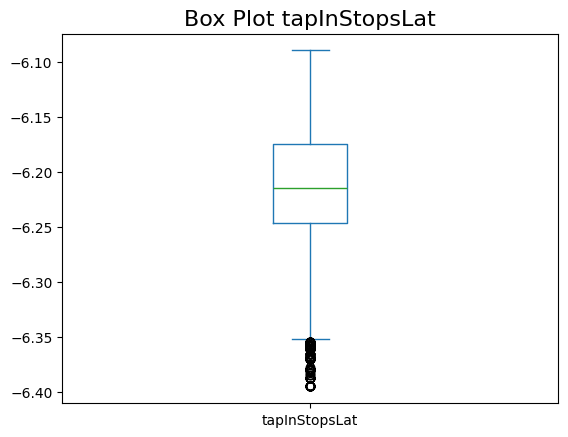

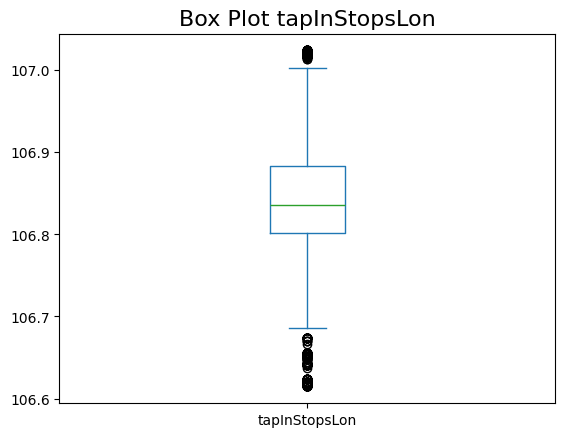

In [20]:
df['tapInStopsLat'].plot(kind='box')
plt.title('Box Plot tapInStopsLat',size=16)
plt.show()
df['tapInStopsLon'].plot(kind='box')
plt.title('Box Plot tapInStopsLon',size=16)
plt.show()

[Text(0.5, 0, 'tapInStopsLat'), Text(0, 0.5, 'tapInStopsLon')]

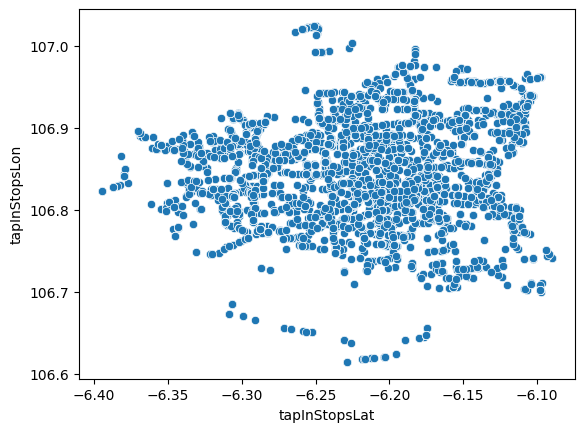

In [21]:
sns.scatterplot(x=df['tapInStopsLat'],y=df['tapInStopsLon']).set(xlabel='tapInStopsLat',ylabel='tapInStopsLon')

In [22]:
#mencari nilai mean dan standar deviasi

mean1 = df['tapInStopsLat'].mean()
std1 = df['tapInStopsLat'].std()
mean2 = df['tapInStopsLon'].mean()
std2 = df['tapInStopsLon'].std()
print('Nilai Mean dan Standar Deviasi adalah')
print(f'Mean tapInStopsLat adalah :',mean1)
print(f'Mean tapInStopsLon adalah :',mean2)
print(f'standar deviasi tapInStopsLat adalah :',std1)
print(f'standar deviasi tapInStopsLon adalah :',std2)


Nilai Mean dan Standar Deviasi adalah
Mean tapInStopsLat adalah : -6.214764907356781
Mean tapInStopsLon adalah : 106.841831239871
standar deviasi tapInStopsLat adalah : 0.05847513516550615
standar deviasi tapInStopsLon adalah : 0.061149016688097524


In [23]:
limit_batas_lat = 3*std1
limit_batas_lon = 3*std2

In [24]:
batas_atas_lat = mean1 + 3*std1
batas_bawah_lat = mean1 - 3*std1

batas_atas_lon = mean2 + 3*std2
batas_bawah_lon = mean2 - 3*std2

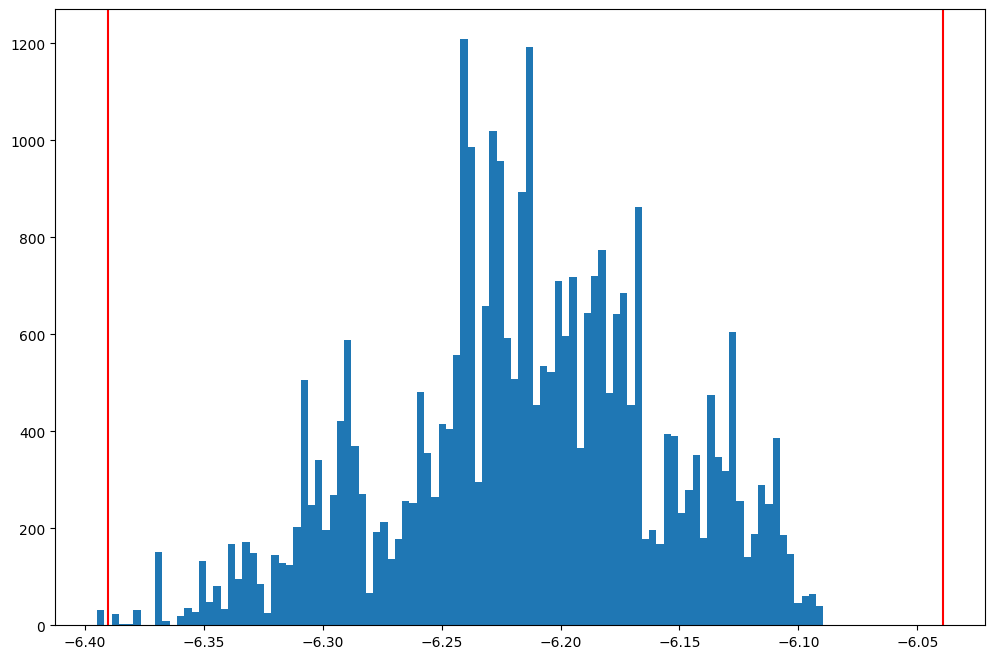

In [25]:
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(df['tapInStopsLat'],bins=100)
ax.axvline(batas_atas_lat, color='r')
ax.axvline(batas_bawah_lat, color='r')
plt.show()


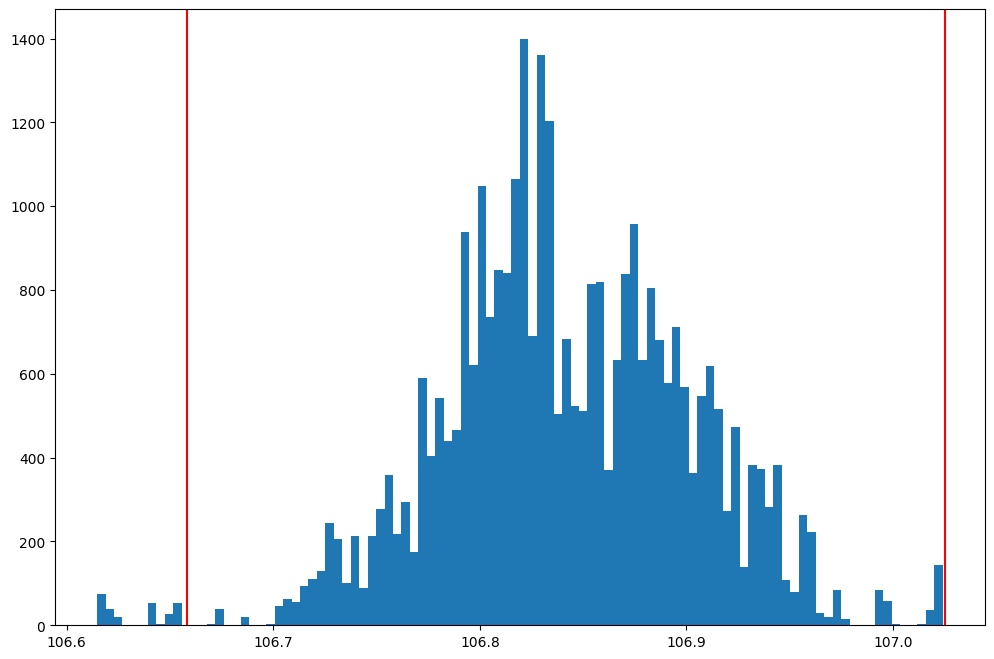

In [26]:
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(df['tapInStopsLon'],bins=100)
ax.axvline(batas_atas_lon, color='r')
ax.axvline(batas_bawah_lon, color='r')
plt.show()

In [27]:
# Z score
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df['tapInStopsLat']))
print(z)

zz = np.abs(stats.zscore(df['tapInStopsLon']))
print(zz)

0        0.515336
1        0.238312
2        1.396049
3        0.325304
4        1.113566
           ...   
37895    0.305654
37896    1.289270
37897    0.025346
37898    0.446503
37899    0.371122
Name: tapInStopsLat, Length: 32555, dtype: float64
0        0.035794
1        0.144097
2        0.449421
3        1.527910
4        0.771386
           ...   
37895    0.306489
37896    0.643172
37897    0.410009
37898    0.528083
37899    1.536782
Name: tapInStopsLon, Length: 32555, dtype: float64


# Data Outlier
Dari Dataset TransJakarta, kita akan melihat dimasing-masing struktur data nya apa mempunyai data Outlier / atau data yang menyimpang dari sebaran data tersebut, dikarenakan sebelum melakukan analisa kita juga harus mengecek data tersebut menyebar normal atau tidak.

Selanjut nya, dari dataset tersebut, kita ingin mengecek data outlier dari tapInStopsLat dan tapInStopsLon, kenapa kita ambil data tersebut, karena data tersebut secara langsung bisa kita analisa bahwa data tersebur merupakan data yang berkolerasi, karena itu merupakan data titik halter berdasarkan Garis Lintang dan Bujur sesuai dengan Map. dari data tersebut apakah nilai dari tapInStopsLat dan tapInStopsLon ada outlier atw tidak bisa di lihat dari analisa di atas.

Bisa di jelaskan bahwa :
1. Dari Grafik Box Plot untuk kedua kolom, ada titik yang di luar kotak (yang merupakan sebaran normal data tersebut). Untuk itu bisa kita simpulkan ada Garis Lintang dan Bujur yang diluar sebaran.
2. Dari grafik scatterplot yang di buat saling berkolerasi, terlihat memang semau nya menyebar secara normal, akan tetapi kalau di lihat secara detail ada data-data yang diluar sebaran normal. yaitu di sisi sebelah kiri di garis -6,4 dan 106.
3. Selanjut nya Nilai Mean dan Standar Deviasi adalah
    - Mean tapInStopsLat adalah : -6.214764907356781
    - Mean tapInStopsLon adalah : 106.841831239871
    - standar deviasi tapInStopsLat adalah : 0.05847513516550615
    - standar deviasi tapInStopsLon adalah : 0.061149016688097524
    Serta untuk grafik histogram, kita buat batas atas dan bawah untuk melihat sebaran data yang keluar dari sebaran. ada 6 data tapInStopsLon dan 1 data tapInStopsLat. begitu juga dengan Nilai Z, ada 6 dan 1 data yang nilai nya di luar rentang batas atas dan batas bawah.
Untuk ini kita bisa mengabaikan data Outlier, karena tidak berpengaruh signifkan untuk analisa kita, dimana tujuan dari dari tapInStopsLon dan tapInStopsLat bisa di jelaskan dengan nama halte saat Tap In, maka dari itu data Outlier di kedua kolom tersebut kita abaikan.




# Data Sudah Bersih
    Selanjutnya dari data yang sudah bersih, maka kita coba melakukan pembetulan type data di masing-masing kolom, sebagi berikut : 

In [28]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)])

dfDesc = pd.DataFrame(columns=['Column Name', 'dataType', 'null', 'Unique', 'UniqueSample'],
                        data=listItem)
print(df.shape)
dfDesc  

(32555, 22)


,Column Name,dataType,null,Unique,UniqueSample
0,transID,object,0,32555,"[UMSO333H3E25WF, MKQR366P9I73WK]"
1,payCardID,object,0,1931,"[3529836046214477, 180044335370375]"
2,payCardBank,object,0,6,"[brizzi, flazz]"
3,payCardName,object,0,1924,"[Jamalia Lestari, Cut Dian Simanjuntak]"
4,payCardSex,object,0,2,"[F, M]"
5,payCardBirthDate,int64,0,66,"[1964, 1974]"
6,corridorID,object,0,216,"[JAK.36, JAK.42]"
7,corridorName,object,0,211,"[Pancoran - Kampung Rambutan, Kampung Melayu -..."
8,direction,float64,0,2,"[0.0, 1.0]"
9,tapInStops,object,0,2452,"[B00693P, B03221P]"


In [29]:
display(df.describe(), df.describe(include='object'))

,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
count,32555.000000,32555.000000,32555.000000,32555.000000,32555.000000,32555,32555.000000,32555.000000,32555.000000,32555,32555.000000
mean,1990.193857,0.500384,-6.214765,106.841831,13.614437,2023-04-16 07:58:48.982337536,-6.214637,106.841581,21.311074,2023-04-16 09:11:01.312701696,2723.606205
min,1946.000000,0.000000,-6.394973,106.614730,0.000000,2023-04-01 06:22:27,-6.394973,106.614730,1.000000,2023-04-01 07:27:31,0.000000
25%,1982.000000,0.000000,-6.245863,106.801940,4.000000,2023-04-10 08:58:50.500000,-6.248460,106.800940,11.000000,2023-04-10 10:15:02,0.000000
50%,1991.000000,1.000000,-6.214145,106.835200,10.000000,2023-04-16 17:39:25,-6.214423,106.834892,18.000000,2023-04-16 19:01:05,3500.000000
75%,2001.000000,1.000000,-6.174903,106.883630,19.000000,2023-04-21 21:36:13,-6.174207,106.884940,30.000000,2023-04-21 23:02:50.500000,3500.000000
max,2012.000000,1.000000,-6.089429,107.023950,68.000000,2023-04-30 21:51:08,-6.091746,107.023660,77.000000,2023-04-30 23:23:18,20000.000000
std,13.066053,0.500008,0.058475,0.061149,12.276359,NaN,0.059651,0.061833,13.900599,NaN,4254.492902


,transID,payCardID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapOutStops,tapOutStopsName
count,32555,32555,32555,32555,32555,32555,32555,32555,32555,32555,32555
unique,32555,1931,6,1924,2,216,211,2452,2451,2151,2150
top,EIIW227B8L34VB,575724437786,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,P00016,BKN
freq,1,40,16133,71,17350,371,371,213,213,284,284


# Data Analis

* Melihat Jam terpadat :

In [30]:
df['tapInHour'] = df['tapInTime'].dt.hour
df['tapOutHour'] = df['tapOutTime'].dt.hour
df['weekday'] = df['tapInTime'].dt.weekday

df['travelduration'] = df['tapOutTime'] - df['tapInTime']
df['travelduration'] = df['travelduration'].dt.total_seconds()/60

In [31]:
def tapGroup(data, by: str):
    res = data.groupby(by)['transID'].count()
    return res

In [32]:
def combinedTap(fn1, fn2):
    hours_counts = fn1.add(fn2, fill_value=0)
    return hours_counts
count_hours = combinedTap(tapGroup(df, 'tapInHour'), tapGroup(df, 'tapOutHour'))


In [33]:
def peakBar(data):
    sns.barplot(x=data.index, y=count_hours.values, color='lightcoral')
    plt.xlabel('hours')
    plt.ylabel('Numbers of Trip')

    plt.show()

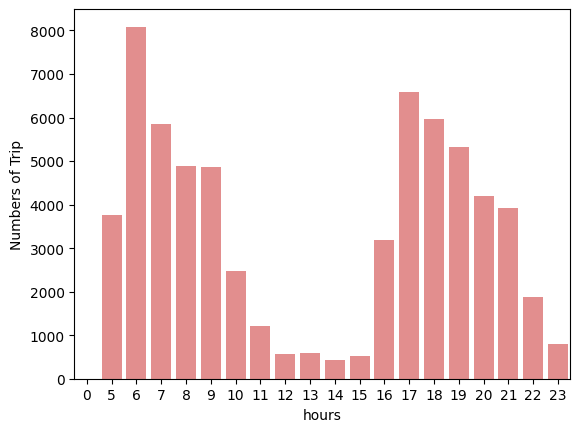

In [34]:
peakBar(count_hours)

* Melihat jumlah perjalanan terbanyak ada pada koridor yang mana

In [35]:
df.value_counts(['corridorName']).head(10)

corridorName                               
Cibubur - Balai Kota                           371
Ciputat - CSW                                  355
Harmoni - Jakarta International Stadium        318
Pulo Gadung - Monas                            317
Kampung Rambutan - Pondok Gede                 308
Kalideres - Bundaran HI via Veteran            304
Rusun Pondok Bambu - Walikota Jakarta Timur    303
Kebayoran Lama - Tanah Abang                   297
Rusun Rawa Bebek - Kodamar                     289
Pasar Minggu - Tanah Abang                     285
Name: count, dtype: int64

[Text(0, 0, 'Cibubur - Balai Kota'),
 Text(1, 0, 'Ciputat - CSW'),
 Text(2, 0, 'Harmoni - Jakarta International Stadium'),
 Text(3, 0, 'Pulo Gadung - Monas'),
 Text(4, 0, 'Kampung Rambutan - Pondok Gede'),
 Text(5, 0, 'Kalideres - Bundaran HI via Veteran'),
 Text(6, 0, 'Rusun Pondok Bambu - Walikota Jakarta Timur'),
 Text(7, 0, 'Kebayoran Lama - Tanah Abang'),
 Text(8, 0, 'Rusun Rawa Bebek - Kodamar'),
 Text(9, 0, 'Pasar Minggu - Tanah Abang')]

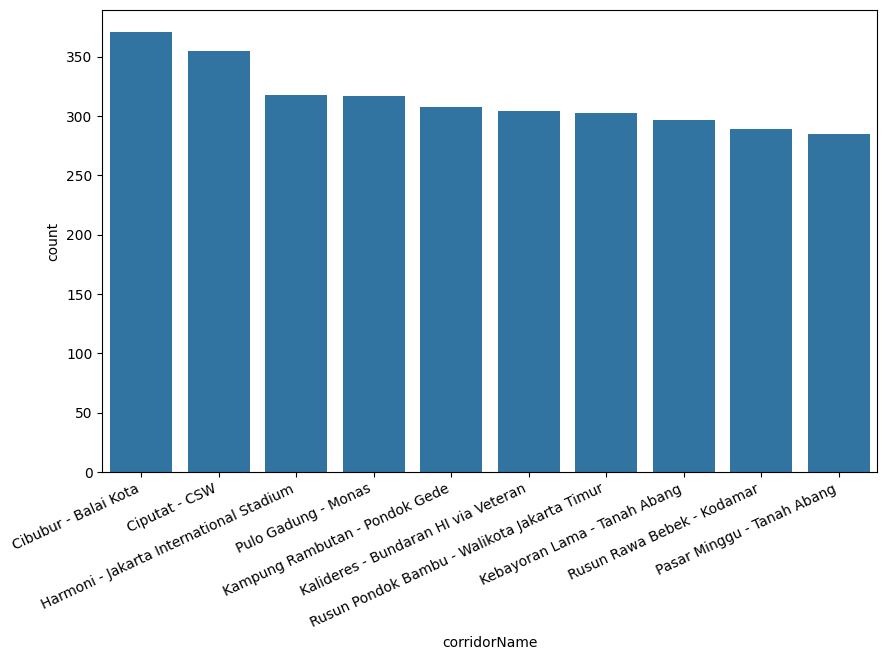

In [36]:
plt.figure(figsize=(10,6))
ax = sns.countplot(df,x='corridorName', order=df['corridorName'].value_counts().iloc[:10].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right")

* Melihat jumlah Tap In Stops Terbanyak

In [37]:
# TAP IN STOPS
df.value_counts(['tapInStopsName']).head(10)

tapInStopsName   
Penjaringan          213
Garuda Taman Mini    187
BKN                  152
BNN LRT              140
Pejaten              134
Penggilingan         119
Seskoal              115
Cibubur Junction     111
Rusun Kapuk Muara    110
Rawa Selatan         103
Name: count, dtype: int64

[Text(0, 0, 'Penjaringan'),
 Text(1, 0, 'Garuda Taman Mini'),
 Text(2, 0, 'BKN'),
 Text(3, 0, 'BNN LRT'),
 Text(4, 0, 'Pejaten'),
 Text(5, 0, 'Penggilingan'),
 Text(6, 0, 'Seskoal'),
 Text(7, 0, 'Cibubur Junction'),
 Text(8, 0, 'Rusun Kapuk Muara'),
 Text(9, 0, 'Rawa Selatan')]

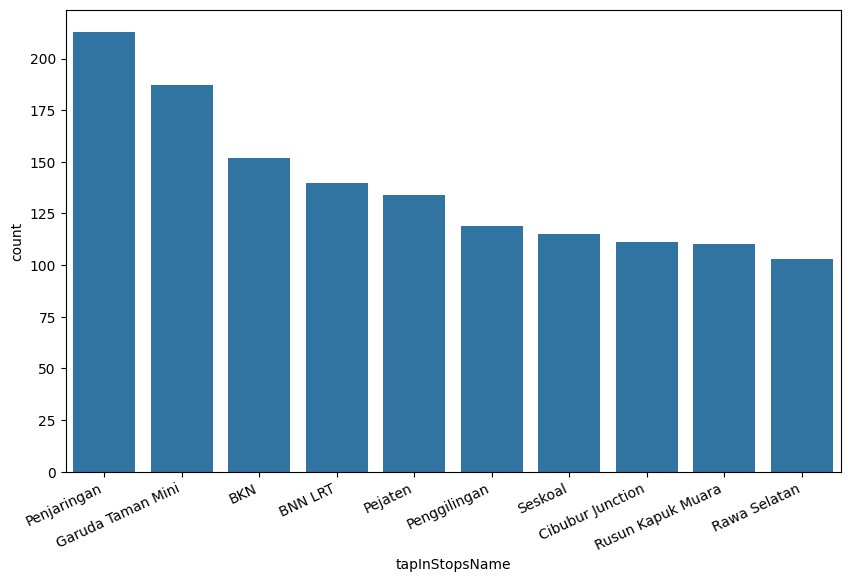

In [38]:
plt.figure(figsize=(10,6))
ax = sns.countplot(df,x='tapInStopsName', order=df['tapInStopsName'].value_counts().iloc[:10].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right")

* Melihat Prosentase Jenis Kelamin Pengguna TransJakarta

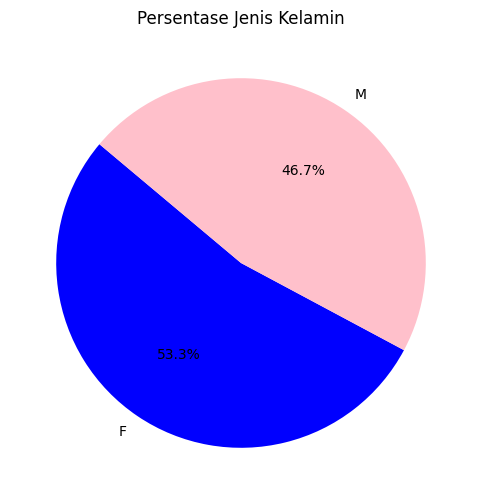

In [39]:
# Hitung jumlah masing-masing jenis kelamin
jumlah_jk = df['payCardSex'].value_counts()

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(jumlah_jk, labels=jumlah_jk.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'pink'])
plt.title('Persentase Jenis Kelamin')
plt.show()

* Melihat Prosentase Pengguna Kartu Bayar dalam melakukan Transaksi TransJakarta

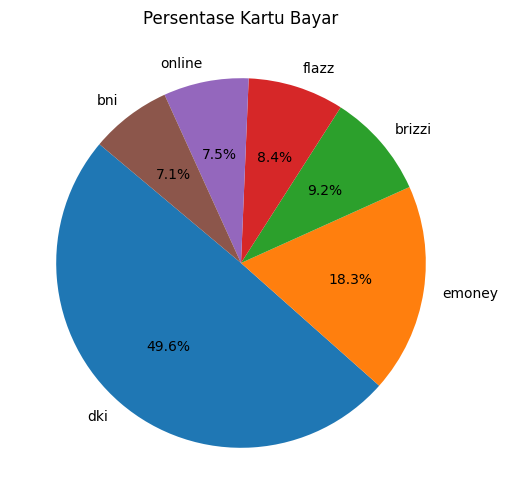

In [40]:
# Hitung jumlah masing-masing Kartu Bayar
jumlah_kartu = df['payCardBank'].value_counts()

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(jumlah_kartu, labels=jumlah_kartu.index, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Kartu Bayar')
plt.show()

# Kesimpulan dan Rekomendasi
    * Kesimpulan
        1. Dilihat dari sebaran waktu transaksi transjakarta, bisa dilihat bahwa pengguna transjakarta paling banyak di pukul 6 pagi dan jam 5 sore, untuk itu bisa di jelaskan bahwa pengguna transaksi itu terpadat saat berangkat kerja dan saat pulang kerja.
        2. Selanjutnya dari sisi koridor, dari data di atas dan dari hasil grafik, bisa dijelaskan bahwa koridor Cibubur - Balai Kota menjadi koridor paling banyak transaksi yaitu sebanyak 371 transaksi, Ciputat - CSW sebanyak 355 transaksi, Harmoni - Jakarta International Stadium sebanyak 318 transaksi, Pulo Gadung - Monas sebanyak 317 transaksi dan Kampung Rambutan - Pondok Gede sebanyak 308 transaksi.
        3. Berbeda dari sisi Halte saat Tap In, dari data di atas dan dari hasil grafik, bisa dijelaskan bahwa Halte Penjaringan menjadi halte paling banyak transaksi yaitu sebanyak 213 transaksi, Garuda Taman Mini sebanyak 187 transaksi, BKN sebanyak 152 transaksi, BNN LRT sebanyak 140 transaksi dan Pejate sebanyak 134 transaksi.
        4. Transaksi berdasarkan jenis kelamin bisa di jelaskan bahwa, pengguna Transjakart paling banyak berjenis kelamin perempuan dengan presentase sebesar 53,3% dan pria sebesar 46,7%
        5. Transaksi berdasarkan Kartu Bayar bisa di jelaskan bahwa, pengguna Transjakart paling banyak menggunakan kartu dari Bank DKI sebanyak 49,6%, Emoney-Bank Mandiri sebanyak 18,3%, Brizi-BRI sebanyak 9,2%, Flazz-BCA sebanyak 8,4%, Online Payment sebanyak 7,5% dan TapCas-BNI sebanyak 7,1%.
    * Rekomendasi
        1. Untuk mengatasi kepadatan saat menggunakan Transjakarta di waktu kerja yaitu jam 6 pagi dan jam 5 sore, diharapkan manajemen perusahaan untuk menyediakan Bus Transjakarta tambahan. Karena tingkat kepadatan itu bisa menghambat pelayanan kita terhadap pengguna transportasi publik yang mana tujuan transportasi publik salah satunya untuk mengurai kemacetan, jika mainset masyarakat terhadap pelayanan transjakarta tidak mempunyai dampak signifikan, maka masyarakat akan kembali berahli ke tranprotasi privite.
        2. Sejalan dari point 1, bisa di lihat bahwa koridor terpadat adalah koridor Cibubur - Balai Kota, untuk itu bisa tambahan armada bus transjakarta bisa di tambahkan di koridor yang mempunyai tingkat kepadatan yang besar.
        3. Dari sisi halte, bisa disampaikan ke manajemen perusahaan Transjakarta untuk dapat merelokasi halte-halte yang menjadi titik padat penumpang naik dan turun. karena dengan kapasitas atau daya tampung melebihi dari pengguna yang naik dan turun bisa menyebabkan antrian yang panjang dan bisa membuat halte tersebut mengalami kerusakan. dan untuk saat ini, manajemen sudah melakukan beberapa relokasi, seperi halte BKN. 
        4. Dilihat dari sisi Jenis Kelamin pengguna Trasnjakarta, diharapkan manajemen perusahaan untuk menambah armada khusus penumpang wanita, ini sejalan dengan point 1. karena lebih dari 53% pengguna transjakarta adalah wanita.
        5. Bisa di lihat dari pengguna kartu pembayaran transjakarta, bahwa kartu dari Bank DKI hampir 50% pengguna menggunakan karti tersebut, ini bisa dijelaskan juga bahawa penumpang rata-rata berasal dari Jakarta. sejalan dengan itu juga, di harapkan manajemen melakukan campaign terkait penggunaan TransJakarta sebagai Trasportasi publik yang berguna untuk mengurai kemacetan Jakarta. salah satu nya adalah :
            - Membuat kegiatan Carfree daya untuk mengedukasi masyarakat untuk menggunakan transjakarta yang berkerja sama dengan Bank DKI dengan program Buka Rekening BANK DKI mendapatkan saldo JakLingko sebesar 25rb.
            - Membuat aplikasi pembayaran online Bank DKI agar memudahkan anak-anak milenial yang sering menggunakan smartphone dalam bertransaksi sehari-hari.
        Untuk itu diharapkan menjadi nilai tambah juga dari Bank DKI dalam menambah pengguna tabungan dan pproduk lain dari Bank DKI.


 
